In [1]:
# useful visualisation and numerical tools
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import seaborn as sns; sns.set();

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

Populating the interactive namespace from numpy and matplotlib


[[ 0.09411765  0.09411765  0.09411765 ...,  0.12156863  0.12156863
   0.12156863]
 [ 0.09411765  0.09411765  0.09411765 ...,  0.12156863  0.12156863
   0.12156863]
 [ 0.09411765  0.09411765  0.09411765 ...,  0.12156863  0.12156863
   0.12156863]
 ..., 
 [ 0.32941176  0.32941176  0.32941176 ...,  0.71764706  0.72156863
   0.72156863]
 [ 0.33333333  0.33333333  0.33333333 ...,  0.72156863  0.72156863
   0.72156863]
 [ 0.3372549   0.3372549   0.3372549  ...,  0.71764706  0.71764706
   0.71764706]] (193, 250)


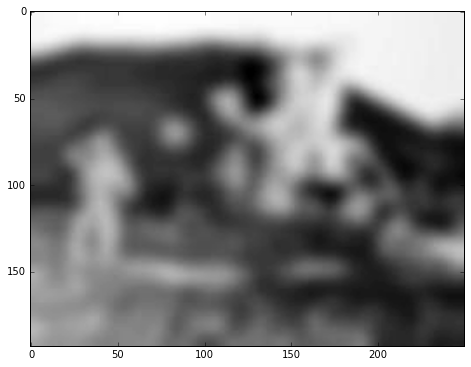

In [8]:
image = np.loadtxt("../homework2/imageGL.dat", skiprows=0)
print image, image.shape

# from PIL import Image

# image = Image.open("../homework2/imageGL.dat").convert("L")
# arr = np.asarray(image)
plt.imshow(image, cmap='gray_r')

In [16]:
def makeGaussianPSF(radius,sizeX,sizeY):
    """ Returns a normalized 2D gauss kernel array for convolutions """   
    x,y = mgrid[-sizeY/2:sizeY/2, -sizeX/2:sizeX/2]
    g = exp(-(x**2/float(radius)+y**2/float(radius)))
    return(g / g.sum())

psf = makeGaussianPSF(10, 250, 193)

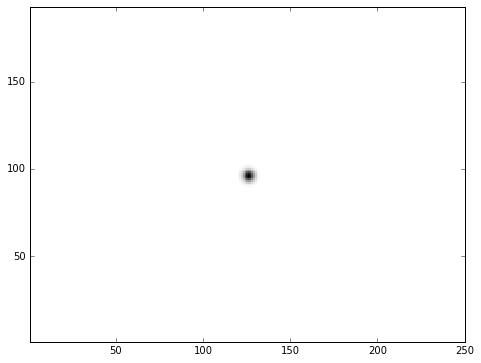

In [17]:
# import matplotlib.cm as cm

nx, ny = (250, 193)
# x = np.linspace(1, nx, nx)
# y = np.linspace(1, ny, ny)
# xv, yv = meshgrid(x, y)
# # nrows, ncols = 193, 250
# print xv, yv

plt.imshow(psf, extent=(1, nx, 1, ny), interpolation='nearest', cmap='gray_r')

In [22]:
def deconvolve(Input, psf, epsilon):
    InputFFT = fftn(Input)
    psfFFT = fftn(psf)#+epsilon
    print psfFFT
#     deconvolved = ifftn(InputFFT/psfFFT)
    deconvolved = ifftn(np.dot(np.linalg.inv(psfFFT), InputFFT))
    deconvolved = np.abs(deconvolved)
    return(deconvolved)

image_recov = deconvolve(image, psf=psf, epsilon=1e-15)
plt.imshow(image_recov, extent=(1, nx, 1, ny), interpolation='nearest', cmap='gray_r')


[[ 1.00000000 +0.00000000e+00j -0.99842211 +7.54094701e-16j
   0.99370336 -6.75065183e-17j ..., -0.98588829 +2.64544226e-15j
   0.99370336 -2.54426294e-15j -0.99842211 +3.30987815e-15j]
 [-0.99722175 +1.62338925e-02j  0.99564824 -1.62082772e-02j
  -0.99094260 +1.61316735e-02j ...,  0.98314924 -1.60048045e-02j
  -0.99094260 +1.61316735e-02j  0.99564824 -1.62082772e-02j]
 [ 0.98893316 -3.22064580e-02j -0.98737273 +3.21556397e-02j
   0.98270620 -3.20036655e-02j ..., -0.97497761 +3.17519697e-02j
   0.98270620 -3.20036655e-02j -0.98737273 +3.21556397e-02j]
 ..., 
 [-0.97527142 -4.76633674e-02j  0.97373254 +4.75881599e-02j
  -0.96913048 -4.73632484e-02j ...,  0.96150867 +4.69907556e-02j
  -0.96913048 -4.73632484e-02j  0.97373254 +4.75881599e-02j]
 [ 0.98893316 +3.22064580e-02j -0.98737273 -3.21556397e-02j
   0.98270620 +3.20036655e-02j ..., -0.97497761 -3.17519697e-02j
   0.98270620 +3.20036655e-02j -0.98737273 -3.21556397e-02j]
 [-0.99722175 -1.62338925e-02j  0.99564824 +1.62082772e-02j
  -

LinAlgError: Last 2 dimensions of the array must be square

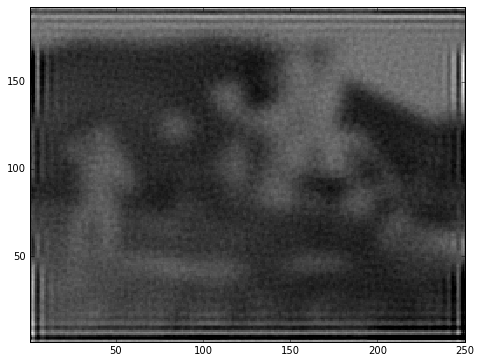

In [20]:
from skimage import color, data, restoration
deconvolved, _ = restoration.unsupervised_wiener(image, psf)
plt.imshow(deconvolved, extent=(1, nx, 1, ny), vmin=deconvolved.min(), vmax=deconvolved.max(), interpolation='nearest', cmap='gray_r')